In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv
/kaggle/input/dogs-vs-cats/test1.zip


In [85]:
import os 
import zipfile
local_zip = '/kaggle/input/dogs-vs-cats/train.zip'
zip_ref=zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/kaggle/tmp')
zip_ref.close()

In [86]:
base_dir = '/kaggle/tmp'
train_dir = os.path.join(base_dir,'train')

In [87]:
train_dir_frames = os.listdir(train_dir)
print(train_dir_frames[:5])

['dog.890.jpg', 'dog.1178.jpg', 'dog.7845.jpg', 'dog.4632.jpg', 'cat.3660.jpg']


In [88]:
filenames = os.listdir("/kaggle/tmp/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [89]:
df.tail(5)

,filename,category
24995,dog.6505.jpg,1
24996,cat.3805.jpg,0
24997,cat.5513.jpg,0
24998,cat.6808.jpg,0
24999,dog.7780.jpg,1


In [90]:
print("tortal training Images = ",len(os.listdir('/kaggle/tmp/train')))

tortal training Images =  25000


In [91]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrow = 4
ncols = 4
pic_index = 0

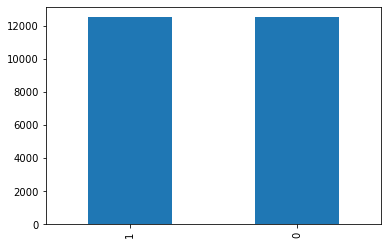

In [92]:
df['category'].value_counts().plot.bar()

In [93]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from sklearn.model_selection import train_test_split

cat.8084.jpg


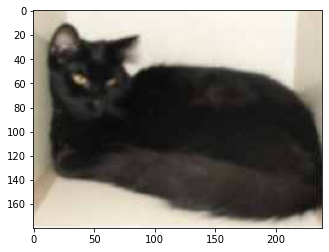

In [94]:
import random
sample = random.choice(filenames)
print(sample)
img = mpimg.imread('/kaggle/tmp/train/'+sample)
plt.imshow(img)


In [95]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape = (150,150,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.20),
    
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.20),
    
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(3,3),
    tf.keras.layers.Dropout(0.25),
    
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.50),
    tf.keras.layers.Dense(1,activation='softmax')
])

In [96]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
batch_normalization_23 (Batc (None, 148, 148, 16)      64        
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
batch_normalization_24 (Batc (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 36, 36, 32)       

In [97]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.0001),
             loss='categorical_crossentropy',metrics=['accuracy'])

In [98]:
print(df.head(10))
df['category'] = df['category'].replace({0:'cat',1:'dog'})
print(df.head(10))

       filename  category
0   dog.890.jpg         1
1  dog.1178.jpg         1
2  dog.7845.jpg         1
3  dog.4632.jpg         1
4  cat.3660.jpg         0
5   dog.814.jpg         1
6  dog.2066.jpg         1
7  dog.8575.jpg         1
8  dog.1444.jpg         1
9  cat.9803.jpg         0
       filename category
0   dog.890.jpg      dog
1  dog.1178.jpg      dog
2  dog.7845.jpg      dog
3  dog.4632.jpg      dog
4  cat.3660.jpg      cat
5   dog.814.jpg      dog
6  dog.2066.jpg      dog
7  dog.8575.jpg      dog
8  dog.1444.jpg      dog
9  cat.9803.jpg      cat


        filename category
0   dog.1220.jpg      dog
1   dog.5640.jpg      dog
2   dog.8800.jpg      dog
3   cat.5480.jpg      cat
4   cat.2015.jpg      cat
5   cat.6751.jpg      cat
6   cat.9188.jpg      cat
7   cat.6127.jpg      cat
8  dog.12006.jpg      dog
9   cat.1639.jpg      cat
        filename category
0   cat.2793.jpg      cat
1   dog.1290.jpg      dog
2  dog.11840.jpg      dog
3   dog.1409.jpg      dog
4   cat.7187.jpg      cat
5   cat.7469.jpg      cat
6   cat.1733.jpg      cat
7   dog.9775.jpg      dog
8   dog.3972.jpg      dog
9   cat.6946.jpg      cat


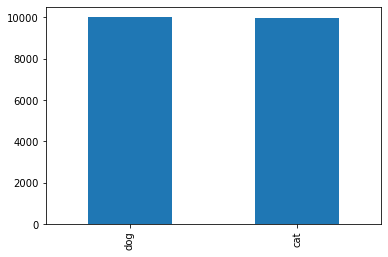

In [99]:
train_data , test_data = train_test_split(df, test_size = 0.2,random_state = 30)

train_data = train_data.reset_index(drop= True)
test_data = test_data.reset_index(drop=True)
print(train_data.head(10))
print(test_data.head(10))

train_data['category'].value_counts().plot.bar()

In [100]:
train_len = train_data.shape[0]
test_len = test_data.shape[0]
batch_size = 20

In [101]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                              rotation_range = 30,
                              shear_range = .2,
                              zoom_range = .2,
                              horizontal_flip = True,
                              width_shift_range = .15,
                              height_shift_range = .15)
train_generator = train_datagen.flow_from_dataframe(train_data,'/kaggle/tmp/train/',
                                                   x_col = 'filename',
                                                   y_col = 'category',
                                                   target_size = (150, 150),
                                                   class_mode = 'categorical',
                                                   batch_size = batch_size)


Found 20000 validated image filenames belonging to 2 classes.


In [102]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_dataframe(test_data, '/kaggle/tmp/train/',
                                                 x_col = 'filename',
                                                 y_col = 'category',
                                                 target_size = (150, 150),
                                                 class_mode = 'categorical',
                                                 batch_size = batch_size)

Found 5000 validated image filenames belonging to 2 classes.


In [103]:
example_data = train_data.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(example_data,'/kaggle/tmp/train',
                                                     x_col = 'filename',
                                                     y_col = 'category',
                                                     target_size = (150, 150),
                                                     class_mode = 'categorical')

Found 1 validated image filenames belonging to 1 classes.


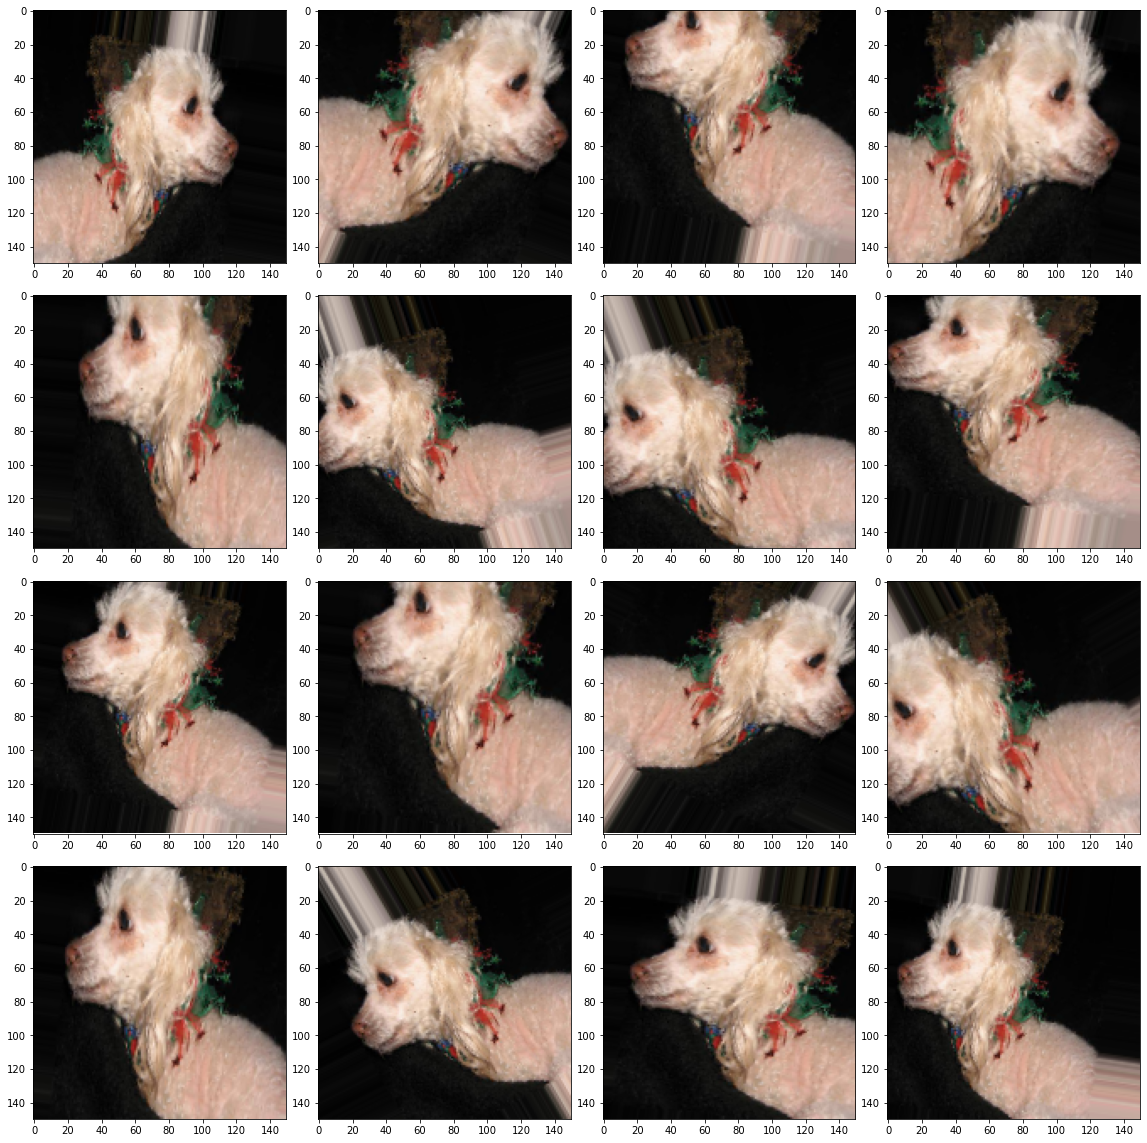

In [104]:
plt.figure(figsize=(16,16))
for i in range(0,16):
    plt.subplot(4,4 , i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [109]:
fastrun = False 
epochs = 3 if fastrun else 20
history = model.fit_generator(train_generator,
                             epochs = epochs,
                             validation_data = test_generator,
                             validation_steps = test_len//batch_size,
                             steps_per_epoch = train_len//batch_size)

Epoch 1/20
1000/1000 [==============================] - 181s 181ms/step - loss: 0.6599 - accuracy: 0.6066 - val_loss: 0.6505 - val_accuracy: 0.6180
Epoch 2/20
1000/1000 [==============================] - 181s 181ms/step - loss: 0.6346 - accuracy: 0.6391 - val_loss: 0.6346 - val_accuracy: 0.6336
Epoch 3/20
1000/1000 [==============================] - 180s 180ms/step - loss: 0.6179 - accuracy: 0.6586 - val_loss: 0.7207 - val_accuracy: 0.6098
Epoch 4/20
1000/1000 [==============================] - 179s 179ms/step - loss: 0.5999 - accuracy: 0.6740 - val_loss: 0.6980 - val_accuracy: 0.6244
Epoch 5/20
1000/1000 [==============================] - 180s 180ms/step - loss: 0.5877 - accuracy: 0.6841 - val_loss: 0.7147 - val_accuracy: 0.6370
Epoch 6/20
1000/1000 [==============================] - 178s 178ms/step - loss: 0.5738 - accuracy: 0.6989 - val_loss: 0.6889 - val_accuracy: 0.6736
Epoch 7/20
1000/1000 [==============================] - 178s 178ms/step - loss: 0.5628 - accuracy: 0.7080 - val_

In [112]:
model.save_weights('model.h5')

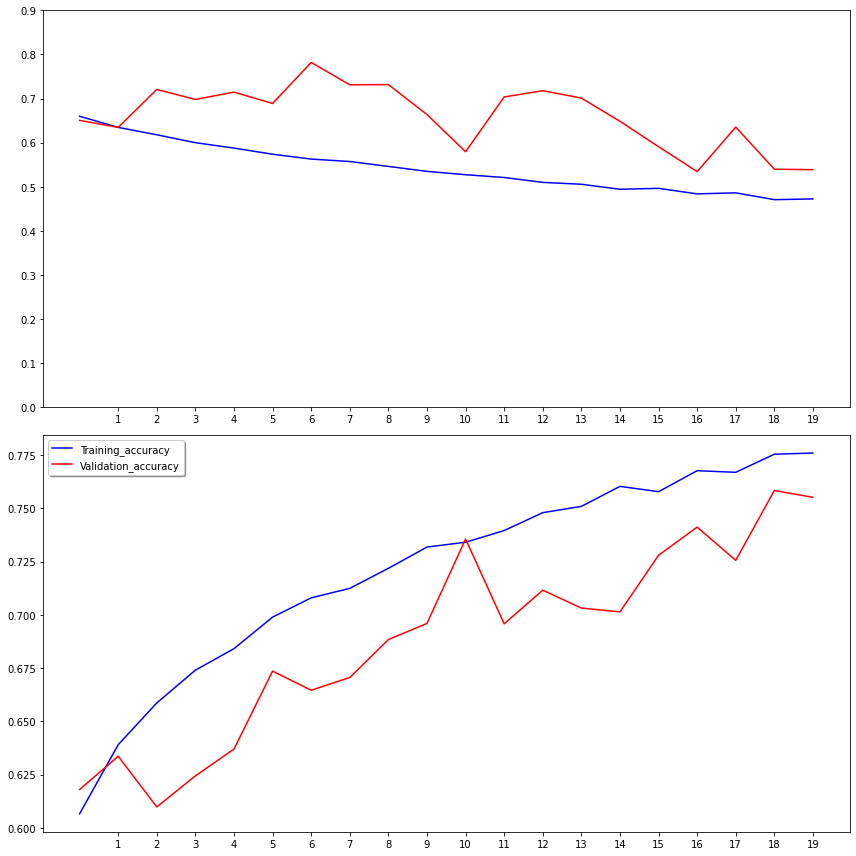

In [114]:
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(12,12))
ax1.plot(history.history['loss'], color='b',label = 'Training_loss')
ax1.plot(history.history['val_loss'], color='r',label='validation_loss')
ax1.set_xticks(np.arange(1,epochs,1))
ax1.set_yticks(np.arange(0,1,0.1))


ax2.plot(history.history['accuracy'],color='b', label = 'Training_accuracy')
ax2.plot(history.history['val_accuracy'], color='r',label='Validation_accuracy')
ax2.set_xticks(np.arange(1,epochs,1))
legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [118]:
import os 
import zipfile
local_zip = '/kaggle/input/dogs-vs-cats/test1.zip'
zip_ref=zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/kaggle/tmp')
zip_ref.close()

base_dir = '/kaggle/tmp'
test_dir = os.path.join(base_dir,'test1')

test_dir_frames = os.listdir(test_dir)
print(test_dir_frames[:5])

test_filenames = os.listdir("/kaggle/tmp/test1")
test_df = pd.DataFrame({'filename': test_filenames})
nb_samples = test_df.shape[0]

['10435.jpg', '6790.jpg', '4644.jpg', '1835.jpg', '1102.jpg']


In [119]:
test_gen = ImageDataGenerator(rescale = 1./255)
test_generator = test_gen.flow_from_dataframe(test_df, '/kaggle/tmp/test1/',
                                            x_col = 'filename',
                                            y_col = None,
                                            class_mode = None,
                                            target_size = (150,150),
                                            batch_size = batch_size,
                                            shuffle = False)

Found 12500 validated image filenames.


In [122]:
predict = model.predict_generator(test_generator,steps = np.ceil(nb_samples/batch_size))

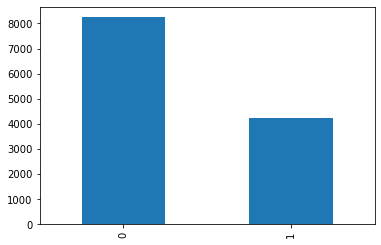

In [124]:
test_df['category'] = np.argmax(predict, axis = -1)
label_map = dict((v,k) for k, v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] =  test_df['category'].replace({'dog':1, 'cat': 0})
test_df['category'].value_counts().plot.bar()

In [125]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize = (12,24))

for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img('/kaggle/tmp/test1/'+filename, target_size = (150,150))
    plt.subplot(6,3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + " {} ".format(category)+" ) " )
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/tmp/test110435.jpg'

<Figure size 864x1728 with 0 Axes>